## Timing Comparison for Training Loops

In [1]:

import wandb
import config
import diamond_world_model_trainer as trainer
import incremental_training as incremental_trainer
import os

run = wandb.init(project="timing-comparison", reinit=True)


Imports successful.
Visualization helpers defined.
Training and validation epoch functions adapted for Batch object and Denoiser.forward.


wandb: ERROR Failed to detect the name of this notebook. You can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: irvin-hwang (irvin-hwang-simulacra-systems) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: WARNING Using a boolean value for 'reinit' is deprecated. Use 'return_previous' or 'finish_previous' instead.


### Run `_main_training` on non-incremental dataset

--- Main Training Execution --- 
--- Configuration ---
Using device: cuda
Configuration loaded for _main_training.
--- Initializing Models for _main_training ---
Denoiser model created for _main_training. Total parameter count: 330,464,131
DiffusionSampler created for visualization in _main_training.
--- Setting up Optimizer and Scheduler for _main_training ---
Optimizer: AdamW with LR=0.0001
LR Scheduler: LambdaLR with 100 warmup steps.
Wandb watching denoiser model.
Using existing best_val_loss model: C:\Projects\jetbot-diffusion-world-model-kong-finder-aux\output_model_2hz_DIAMOND_laundry_nonincremental_test\checkpoints\denoiser_model_best_val_loss.pth
Loading checkpoint for _main_training from: C:\Projects\jetbot-diffusion-world-model-kong-finder-aux\output_model_2hz_DIAMOND_laundry_nonincremental_test\checkpoints\denoiser_model_best_val_loss.pth
Resuming _main_training from epoch 1.
Loaded combined CSV with columns: ['session_id', 'image_path', 'timestamp', 'action']
Full dataset 

Filtering Dataset:   0%|          | 0/60 [00:00<?, ?it/s]

Filtered down to 23 samples.
Filtering dataset with 60 samples for actions: [0.13]


Filtering Dataset:   0%|          | 0/60 [00:00<?, ?it/s]

Filtered down to 37 samples.
Found 23 stopped and 37 moving samples.
--- Starting Training Process in _main_training ---
--- Training Complete (Stopped after epoch 1) ---
Total training duration: 0:00:00
--Return--
None
> c:\users\irvin\appdata\local\temp\ipykernel_21236\3668242613.py(7)<module>()



ipdb>  trainer_run


ipdb>  trainer_run.history


*** AttributeError: 'Run' object has no attribute 'history'


ipdb>  q


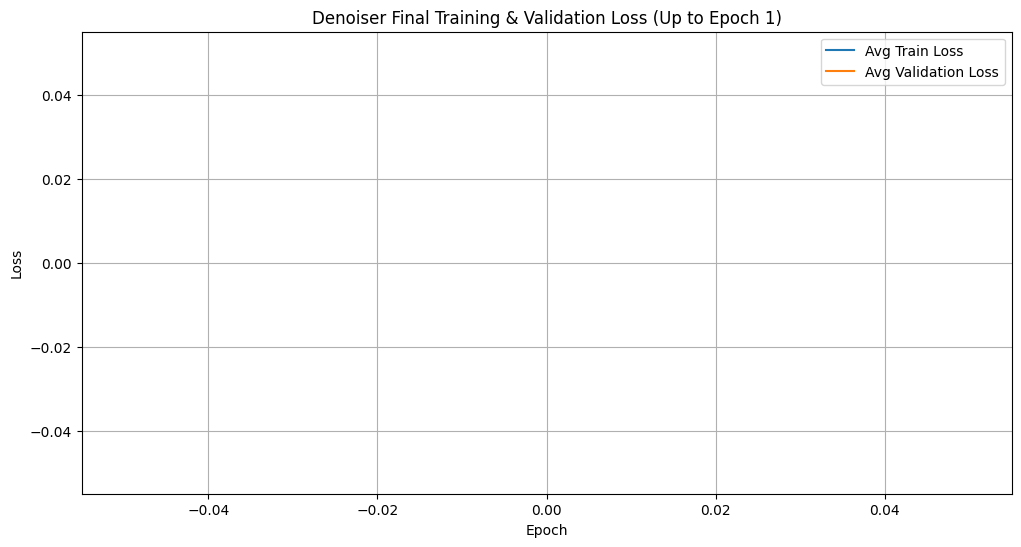

In [3]:
import pdb

config.OUTPUT_DIR = os.path.join(config.AUXILIARY_DIR, 'output_model_2hz_DIAMOND_laundry_nonincremental_test')
config.DATA_DIR = os.path.join(config.AUXILIARY_DIR, 'jetbot_data_two_actions_nonincremental_test')
config.NUM_EPOCHS = 1
trainer_run = trainer._main_training(finish_run=False)
pdb.set_trace()
noninc_table = trainer_run.history[-1].get("train_epoch_perf")
wandb.finish()


### Run `train_diamond_model` on incremental dataset

In [ ]:
config.OUTPUT_DIR = os.path.join(config.AUXILIARY_DIR, 'output_model_2hz_DIAMOND_laundry_incremental_test')
config.DATA_DIR = os.path.join(config.AUXILIARY_DIR, 'jetbot_data_two_actions_incremental_test')
wandb.init(project="timing-comparison", reinit=True)

incremental_trainer.main()
inc_table = wandb.run.history[-1].get("incremental_perf")
wandb.finish()


### Compare timings

In [ ]:

import pandas as pd

if noninc_table is not None and inc_table is not None:
    df_non = pd.DataFrame(noninc_table.data, columns=noninc_table.columns)
    df_inc = pd.DataFrame(inc_table.data, columns=inc_table.columns)
    display(df_non.describe())
    display(df_inc.describe())
